

# Project: TMDb Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

 ### The data to be analysed below is made up of about 10,000 movies collected from the movie data base "TMDb". The aim of this analysis is to find out :
 
 ### which genre of movies most popular from year to year? 
 
 ### does movies with long runtime  yield profit?
 
###  Does particular directors influence popularity of movies?


<a id='wrangling'></a>
## Data Wrangling

#### now that the questions to be answered are known the next step is to gather, access and clean the TMDb data to enable effective analysis

#### it should be noted that the write up in blue explains the need of the code  in all cells  below





In [1]:
# first things first, i imported all libraries used in this analysis to ensure ease of access o them; and they are as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# aim of first cell is to open the first 5 values of the data set 
df = pd.read_csv("tmdb-movies.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'tmdb-movies.csv'

In [3]:
# now that the csv file has been read, the next code is to view the first 5 elements of the csv file
df.head()

NameError: name 'df' is not defined

In [19]:
# the code in this  cell finds the total no of  rows and columns respectively
df.shape

(10866, 21)

In [ ]:
# to check the available no of null values and the availabel data type, the code below can be entered 
df.info()

In [21]:
#not all the available data sets are needed  for the data wrangling process, the next step to to drop data set not needed
df.drop(["cast", "homepage" , "tagline" ,"keywords", "overview","production_companies","vote_count",  
         "vote_average", "budget_adj", "revenue_adj"],axis = 1, inplace= True)

In [23]:
# check the total no of rows and columns now, by calling on thecode below
df.info()
# it is seen that we now have a total of 10866 rows and 11 columns, the cells below shows what next to be done.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  release_year    10866 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 933.9+ KB


In [ ]:
# we can also  find total no of duplicates in data set
sum(df.duplicated())


In [ ]:
#  the nexty step is to drop  the duplicates. The inplace command actually inputs the command in the code
df.drop_duplicates(inplace= True)


In [ ]:
# confirm if there are no duplicates
sum(df.duplicated())


In [5]:
# we can also find the no of unique characters in each variabkle within the data frame using the code below
df.nunique()

NameError: name 'df' is not defined

In [ ]:
# Fill missing  value in data frame
df["director"].fillna(df["director"].mode()[0], inplace= True)


In [ ]:
# find the missing value of genre as they have some null values
df["genres"].mode()


In [ ]:
df["genres"].fillna(df["genres"].mode()[0], inplace = True)

In [ ]:
# check the total no of rows and columns to see if the missing values have beein found
df.info()




### Data Cleaning still a part of the data wrangling process,
### the following codes in cells below will be run to efficiently clean the data

In [4]:
# there are missing values in the directors and genres columns, the following codes should be run to fill in the missing values
# find the highest occuring value for the directors
df["director"].mode()

NameError: name 'df' is not defined

In [35]:
# find the highest occuring value for the genres
df["genres"].mode()

0    Comedy
1     Drama
Name: genres, dtype: object

In [36]:
# Fill in missing  value in data frame
df["director"].fillna(df["director"].mode()[0], inplace= True)
df["genres"].fillna(df["director"].mode()[0], inplace= True)

In [45]:
# check the total no of rows and columns to see if the missing values have beein found
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   budget          10865 non-null  int64         
 4   revenue         10865 non-null  int64         
 5   original_title  10865 non-null  object        
 6   director        10865 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10865 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1018.6+ KB


In [57]:
#now that we have no missing values in the data set, the next step is to answer the questions
# before that the release date does not connote the normal pandal function. To change this,
df["release_date"] = pd.to_datetime(df["release_date"])


In [58]:
# there are some years with abnormal representation e.g 2060, insead of 1960, the code below hepls resolve this 
df.release_date= df.apply(lambda x: x.release_date.replace(year = x.release_year), axis =1)

In [61]:
# check the representation of the release year now
df[["release_date"]].tail()

release_date
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What genre of movies is popular from year to year)

In [71]:
# we csn find the mean , standard deviation and percentile using the code below
df.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

       release_year        profit  
count  10865.000000  1.086500e+04  
mean    2001.321859  2.520261e+07  
std       12.813260  9.659103e+07  
min     1960.000000 -4.139124e+08  
25%     1995.000000  0.000000e+00  
50%     2006.000000  0.000000e+00  
75%     2011.000000  9.092453e+06  
max     2015.000000  2.544506e+09

In [70]:
# the total no of unique values is 2039
df["genres"].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [62]:
# to find genres most popular from year to year , the group by function should be used
df_genre = df.groupby(["release_year","genres"])["popularity"].mean()
df_genre.head()

release_year  genres                                
1960          Action|Adventure|Drama|History|Western    0.310398
              Action|Adventure|Western                  1.872132
              Action|Drama|Foreign|History|War          0.194948
              Action|Drama|History                      1.136943
              Action|Drama|History|War                  0.256779
Name: popularity, dtype: float64

In [63]:
# now we know that the release year 1960 has the most popular movie genre
df.query("release_year== 1960").groupby(["release_year","genres"])["popularity"].mean()



release_year  genres                                            
1960          Action|Adventure|Drama|History|Western                0.310398
              Action|Adventure|Western                              1.872132
              Action|Drama|Foreign|History|War                      0.194948
              Action|Drama|History                                  1.136943
              Action|Drama|History|War                              0.256779
              Action|Drama|Romance|Western                          0.266435
              Action|Drama|Western                                  0.421043
              Action|Western                                        0.267118
              Adventure|Family                                      0.465879
              Adventure|Fantasy|Science Fiction                     0.144106
              Comedy                                                0.180872
              Comedy|Drama|Romance                                  0.668774
           

In [1]:
# to visualise better a bar chart can be plotted to view the genre with the highest poplularity
df.query("release_year== 1960").groupby(["release_year","genres"])["popularity"].mean().plot(kind= "bar", figsize = (8,8));
x


NameError: name 'df' is not defined

## it is seen that the movie genre drama|horror|thriller of 1960 is most popular

### Research Question 2 ( does runtime have influence  profit?)

In [72]:
# use the describe function also to find the meam, std,min, percentile , max of the values 
df["runtime"].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [73]:
# another column for profit should be created
df["profit"] = df["revenue"]- df["budget"]




In [76]:
# we can bin the edges using the following code
bin_edges = (0, 90,99,111,900)

In [91]:
# use the bin_names for the labels 
bin_names = ("extra_long", "long_movies", "short_movies", "clips" )

In [92]:
df["runtime_type"] = pd.cut(df["runtime"], bin_edges, labels = bin_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   budget          10865 non-null  int64         
 4   revenue         10865 non-null  int64         
 5   original_title  10865 non-null  object        
 6   director        10865 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10865 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  release_year    10865 non-null  int64         
 11  profit          10865 non-null  int64         
 12  runtime_type    10834 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1.1+ MB


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   budget          10865 non-null  int64         
 4   revenue         10865 non-null  int64         
 5   original_title  10865 non-null  object        
 6   director        10865 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10865 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  release_year    10865 non-null  int64         
 11  profit          10865 non-null  int64         
 12  runtime_type    10834 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1.1+ MB


In [100]:
plt.scatter(x= df["runtime"], y= df["profit"]);
plt.title("plot of TMDb  runtime to profit")
plt.xlabel("Runtime of TMDb Movies")
plt.ylabel("profit incured")
plt.show()


In [94]:
df["profit"].max()

2544505847

<AxesSubplot:xlabel='runtime_type'>

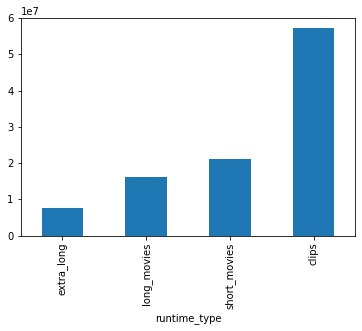

In [95]:
df.groupby('runtime_type')['profit'].mean().plot(kind='bar')

# It is shown that movies with runtime less than 200 makes the highest profit. 

# It also shows that Clips under the runtime_type makes the hishest profit

  # Research Question 3 ( Do particular directors influence popularity of movies?)

In [101]:

df.groupby("director")["popularity"].mean().sort_values(ascending= False).head(10)

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Kyle Balda|Pierre Coffin        7.404165
Alan Taylor                     6.883129
Peter Richardson                6.668990
Pete Docter                     6.326804
Christopher Nolan               6.195521
Name: popularity, dtype: float64

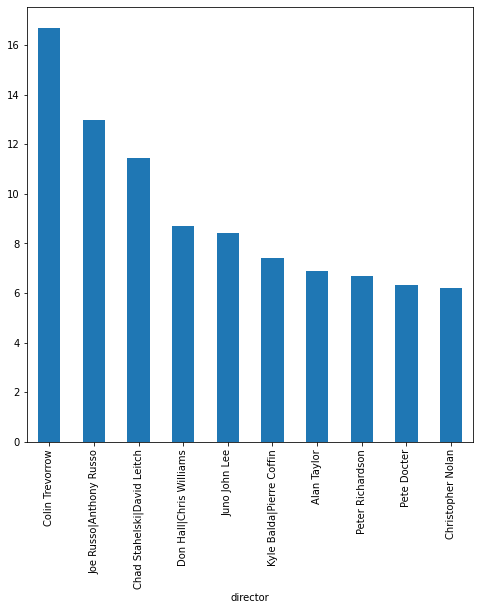

In [102]:
df.groupby("director")["popularity"].mean().sort_values(ascending=False).head(10).plot(kind='bar', 
                 x ="Names of Director", y = "Popularity", title = "Directors in TMDb movies", fig size=(8,8));
                                                                                       
# The bar chart below shows that colin Trevorrow has the highest popularity

# The bar chart above shows that colin Trevorrow has the highest popularity

In [89]:
df.groupby("director")["popularity"].mean().sort_values(ascending=False).head(10).plot(kind='pie', figsize =(8,8));
# The pie chart below can also be used to visualise the set data .

# Conclusion

### From this analysis, it was discovered that the; 
### the genre 0f 1960 movies  is the most popular

### there was no direct relationship between runtime and profit incured, but movies with runtime less than *200* made the highest profit, the ones that fell under the category- *Clip* of runtime type

### The most popular director is *Colin Trevorrow*

# *Note that kaggle was helpful in the successful analysis of this dataset*